# Analyzing results

We will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [1]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# different styles are predefined that give different appearance to the plots. This one emulates the style of 
# the figures you'll find on statisical analysis news site fivethirtyeight.com
plt.style.use('fivethirtyeight')

In [3]:
# reading data stored in results.dat

file_name = 'results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

# You should know what to do
number_of_protons = all_data[0]
number_of_neutrons = all_data[1]
experimental_values = all_data[2]
experimental_uncertainties = all_data[3]
theoretical_values = all_data[4]
theoretical_uncertainties = all_data[5]


### Comparing Experimental and Theoretical values

#### As a function of the number of protons

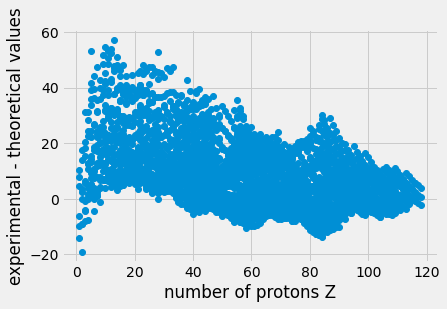

In [4]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates

# In pyplot, using the argument '.' will draw points as a marker instead of lines.
# Other markers are available (circles 'o', triangles '^', diamonds 'd', starts '*', .... )
# See the notes section in the documentation for more details
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(number_of_protons, experimental_values-theoretical_values, 'o')

# Set appropriate labels with the correct units.
plt.xlabel('number of protons Z')
plt.ylabel('experimental - theoretical values')
# plt.xlabel(...)
# plt.ylabel(...)
# legend displays the labels given in each plot
plt.show()

#### As a function of the number of neutrons

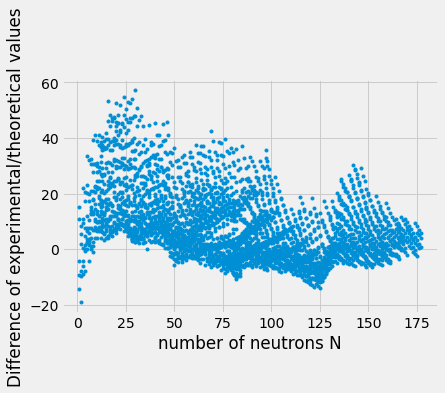

In [5]:
# You know what to do

# plt.plot(...)
# plt.xlabel(...)
# ...
# ...
plt.plot(number_of_neutrons, experimental_values-theoretical_values, '.')

plt.xlabel('number of neutrons N')
plt.ylabel('Difference of experimental/theoretical values')

plt.show()

What type of structure do you see in the difference between experimental and theoretical values?

Describe it and explain the reasons behind it in the cell below

**Your discussion goes here**

A triangle (if it has to be) where the N = 0 is the base, and N = 175 is the top of the triangle.
On the other word, as Z or N goes larger, the difference goes smaller.

### Comparing theoretical and experimental uncertainties

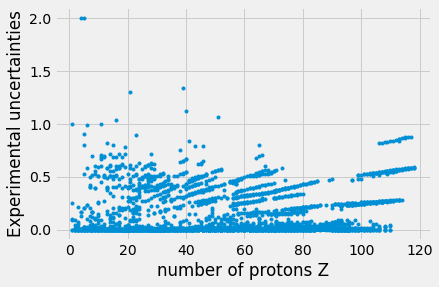

In [6]:
# Make a plot of the experimental errors in this cell
# Also use points instead of lines
plt.plot(number_of_protons, experimental_uncertainties, '.')

plt.xlabel('number of protons Z')
plt.ylabel('Experimental uncertainties')

plt.show()

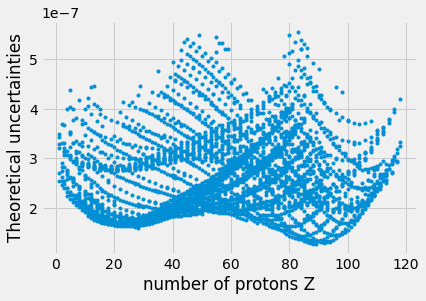

In [7]:
# Make a plot of the theoretical errors in this cell
# Also use points instead of lines
plt.plot(number_of_protons, theoretical_uncertainties, '.')

plt.xlabel('number of protons Z')
plt.ylabel('Theoretical uncertainties')

plt.show()

Discuss in the cell below if the experimental and theoretical errors are similar or not (do they have the same order of magnitude). Also discuss why

**Your discussion goes here**

Those two erroes are NOT similar. Where the experimental errors looks like water lines, the theoretical errors look like waves. Also experimental are large which might caused by the physically testing. The theoretical erroes are very small might be caused by the calculations.

## Advanced part of the project

### Reading the data from results file

In [8]:
# reading data stored in results_advanced.dat

file_name = 'results_advanced.dat'

all_data = np.loadtxt(file_name,skiprows=1)

all_data = all_data.transpose()

#'N', 'stable isotope position', 'neutron drip-line position'
number_of_protons = all_data[0]
stable_isotope_position = all_data[1]
neutron_dripline_position = all_data[2]

# You should know how to do this by now

### Drawing the positions of the stable isotopes and neutron dripline

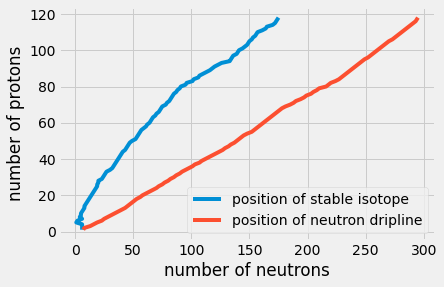

In [9]:
# Your plots here should be two lines. (not points like in the previous ones)

# The x-axis should indicate the number of neutrons
# The y-axis should indicate the number of protons
plt.plot(stable_isotope_position, number_of_protons, label = 'position of stable isotope')
plt.plot(neutron_dripline_position, number_of_protons, label = 'position of neutron dripline')

plt.xlabel('number of neutrons')
plt.ylabel('number of protons')

plt.legend()
plt.show()
plt.show()

## Defining a function to calculate the reduced $\chi^2$

In [10]:
# Python allows you to define functions!

def reduced_chi_square(experiment, sigma, theory, n_parameters):
    # The function takes numpy arrays containing the experimental and theoretical values
    chi_square = ((experiment - theory)/sigma)**2
    # chi_square is anohter numpy array that contains the results of the element-wise operations
    n_data = len(experiment)
    # The len() function gives you the length of an array
    
    # we can use the numpy function sum to add all the elements in chi_square
    chi_square = np.sum(chi_square)/(n_data - n_parameters)
    return chi_square

# Python uses indentation to indicate the start and
# end of block constructs (definitions, for loops, if statements, etc)

In [11]:
# Now we can use our new function to calculate the reduced chi square


# chi2 = reduced_chi_square(...)


#print('The reduced chi sqaure for the liquid drop model is :',chi2)